In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-data/IMDB-Movie-Data.csv


# **Importing Libraries**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading the csv file**

In [11]:
data = pd.read_csv('/kaggle/input/imdb-data/IMDB-Movie-Data.csv')

# **Data Information**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# **Data Cleaning**

First check if there are Null values

In [13]:
data.isnull().values.any()

True

Check which column has how many Null values

In [14]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

Visualing Null values using Seaborn's Heatmap

<AxesSubplot:>

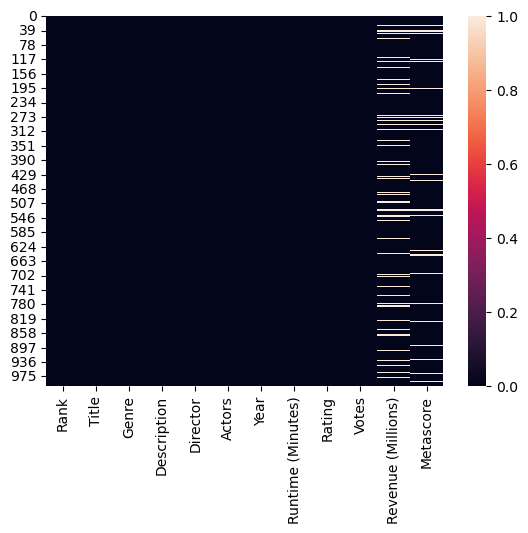

In [15]:
sns.heatmap(data.isnull())

Drop All the missing values

In [16]:
data.dropna(axis = 0, inplace = True)
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

Check duplicate data

In [17]:
duplicates = data.duplicated().any()
duplicates

False

Data Statistics

In [18]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


# **Data Visualisation**

**Which year has highest average voting**

In [19]:
data.groupby('Year')['Votes'].mean().sort_values(ascending = False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

Visualising the above data using Seaborn's barplot

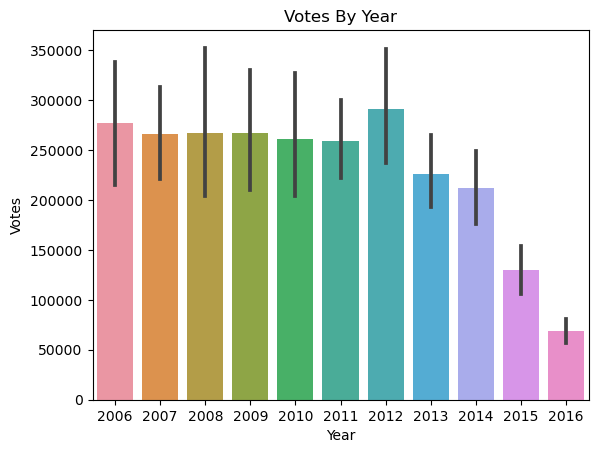

In [20]:
sns.barplot(x = 'Year', y = 'Votes', data = data)
plt.title('Votes By Year')
plt.show()

**Which year has highest average revenue**

In [21]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending = False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

Visualising the above data

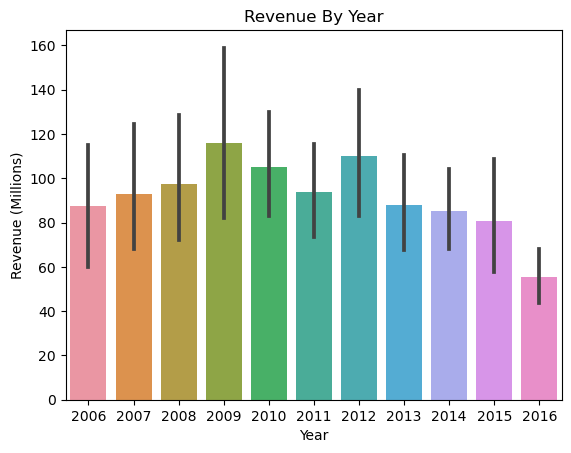

In [22]:
sns.barplot(x = 'Year', y = 'Revenue (Millions)', data = data)
plt.title('Revenue By Year')
plt.show()

**Average rating for each director**

In [23]:
data.groupby('Director')['Rating'].mean().sort_values(ascending = False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

**Top ten lengthy movies**

In [27]:
le =data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')
le

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


Visualising above data

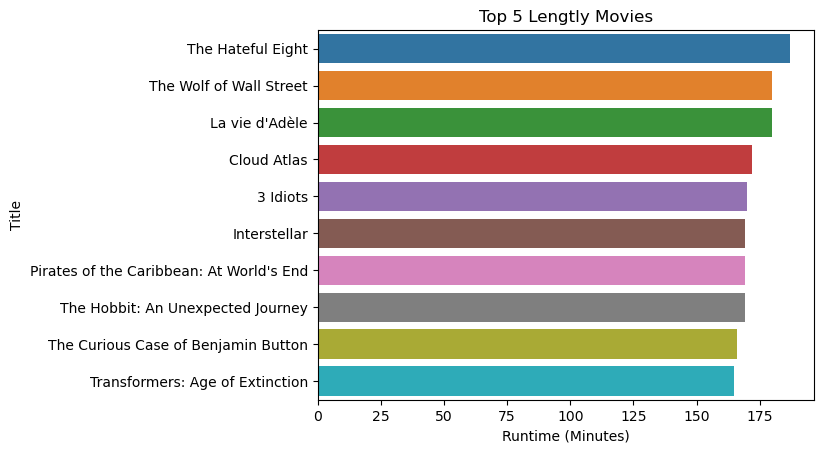

In [30]:
sns.barplot(x = le['Runtime (Minutes)'],y=le.index)
plt.title('Top 5 Lengtly Movies')
plt.show()

**Number of movies per year**

In [33]:
data['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

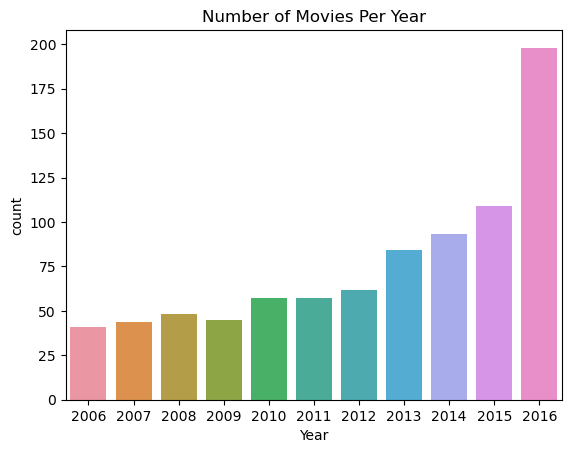

In [32]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies Per Year")
plt.show()

**Top ten highest rated movies**

In [34]:
top_10=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')
top_10

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


Text(0.5, 1.0, 'Display Top 10 Highest Rated Movie Titles')

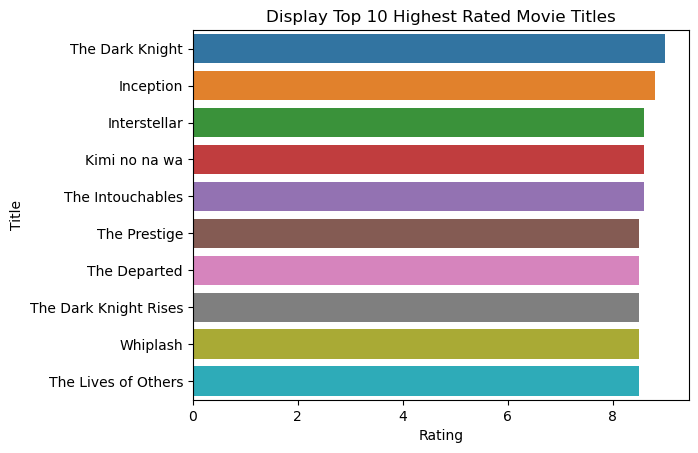

In [36]:
sns.barplot(x = top_10['Rating'],y = top_10.index)
plt.title("Display Top 10 Highest Rated Movie Titles")